# **A) RETRIEVING DEPENDENCIES**
    #importing dependencies
    #reading csv file
    #separating dependent and independent variables
    #splitting the dataset into the Training set and Test set
    #indicating the shape of training and testing data

In [ ]:
#import dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

!pip install dalex
import dalex as dx

In [ ]:
#read csv file

df = pd.read_csv('Group_Project_DSC761_FeatureEngineering_VIF_300122-outlier_treated_SMOTE.csv', header=0)
df

,att0,timestamp_,task_index,machine_id,priority,cpu_request,memory_request,disk_space_request,different_machine_restriction,cpu_rate,canonical_memory_usage,disk_i_o_time,local_disk_space_usage,maximum_cpu_rate,maximum_disk_i_o_time,cycles_per_instruction,event_type
0,0.571564,0.323034,0.173791,0.120373,0.100000,0.454545,0.447118,0.212050,0.0,0.120327,0.113557,0.092867,0.044446,0.180972,0.180730,1.000000,0.0
1,0.571614,0.323118,0.043648,0.098205,0.000000,0.045440,0.058128,0.425202,0.0,0.023178,0.021797,0.073094,0.000000,0.122182,0.566249,0.415552,1.0
2,0.571663,0.306648,0.042447,0.000355,0.900000,0.499855,1.000000,0.064044,0.0,0.064687,0.031344,1.000000,0.133333,0.112937,0.629141,0.091293,0.0
3,0.571763,0.306876,0.163380,0.000253,0.000000,0.363564,0.671105,0.085051,0.0,1.000000,1.000000,0.318697,0.400000,1.000000,0.633169,0.052683,0.0
4,0.571813,0.306900,0.147362,0.058062,0.000000,0.090909,0.109196,0.445240,0.0,0.004505,0.092784,0.069476,0.000000,0.038499,0.389436,0.591828,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12371,0.916029,0.779580,0.116240,0.000307,0.000000,0.454545,0.131075,0.020996,0.0,0.009223,0.017132,0.060970,0.000000,0.045901,0.071137,0.305931,0.0
12372,0.197394,0.146250,1.000000,0.048878,0.000000,0.090909,0.223552,0.445240,0.0,0.059121,0.187537,0.568069,1.000000,0.235464,0.909525,0.353578,0.0
12373,0.144018,0.083881,1.000000,0.093787,0.000000,0.090909,0.223552,0.445240,0.0,0.026255,0.106117,0.201818,1.000000,0.294649,0.491284,0.545518,0.0
12374,0.195870,0.145212,0.064983,0.000289,0.000000,0.036257,0.066640,0.037750,0.0,0.004966,0.052827,0.071252,0.000000,0.048578,0.446441,1.000000,0.0


* Dataset from Feature Engineering output using VIF method is retrieved
* Total number of data points is 12,376 rows with 17 columns

In [ ]:
#separating dependent and independent variables

X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
y = df.iloc[:, 16]
print(y)

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
12371    0.0
12372    0.0
12373    0.0
12374    0.0
12375    0.0
Name: event_type, Length: 12376, dtype: float64


* The features are separated between independent and target variables
* event_type specified as target variable (label)

In [ ]:
X.head()

,att0,timestamp_,task_index,machine_id,priority,cpu_request,memory_request,disk_space_request,different_machine_restriction,cpu_rate,canonical_memory_usage,disk_i_o_time,local_disk_space_usage,maximum_cpu_rate,maximum_disk_i_o_time,cycles_per_instruction
0,0.571564,0.323034,0.173791,0.120373,0.1,0.454545,0.447118,0.212050,0.0,0.120327,0.113557,0.092867,0.044446,0.180972,0.180730,1.000000
1,0.571614,0.323118,0.043648,0.098205,0.0,0.045440,0.058128,0.425202,0.0,0.023178,0.021797,0.073094,0.000000,0.122182,0.566249,0.415552
2,0.571663,0.306648,0.042447,0.000355,0.9,0.499855,1.000000,0.064044,0.0,0.064687,0.031344,1.000000,0.133333,0.112937,0.629141,0.091293
3,0.571763,0.306876,0.163380,0.000253,0.0,0.363564,0.671105,0.085051,0.0,1.000000,1.000000,0.318697,0.400000,1.000000,0.633169,0.052683
4,0.571813,0.306900,0.147362,0.058062,0.0,0.090909,0.109196,0.445240,0.0,0.004505,0.092784,0.069476,0.000000,0.038499,0.389436,0.591828


* Example of Top 5 data from independent variables

In [ ]:
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: event_type, dtype: float64

* Example of Top 5 data from dependent (target) variables

In [ ]:
#splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Indicate the shape of training and testing data
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(12376, 16) (8663, 16) (3713, 16) (12376,) (8663,) (3713,)


* Data set is splitted into 2 sets
* 70% for training and remaining 30% for testing

Three processess are followed for each model:
1. Setting hyperparameter value - this is crucial to set the selected parameters that needs to be find
2. Specify the best estimator into model - the function is to find the optimal combinations of parameter that are set earlier
3. Prediction - this step is to predict the class of label in testing dataset for evaluation

# **B) LOGISTIC REGRESSION MODELING**
        #defining grid search parameters of Logistic Regression
        #hyperparameter tuning using training data - to find the optimal combination of hyperparameters that minimize a predefined loss function to give better results
        #specifying class_weight, max_iter in LR modeling
        #predicting target variable

LOGISTIC REGRESSION MODEL

In [ ]:
#define grid search parameters Logistic Regression
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000], #number of iterations                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #algorithm to use for optimization   
    'class_weight': ['balanced'] #to troubleshoot unbalanced data sampling 
}

* param_grid_lr is used to find the selected set of optimal parameter combinations, which are maximum number of iterations, optimization algorithm, and method of troubleshooting unbalanced sample class weight for Logistic Regression model

In [ ]:
#hyperparameter tune using training data - to find the optimal combination of hyperparameters that minimize a predefined loss function to give better results


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), 
                             param_grid=param_grid_lr, verbose=1, cv=3, n_jobs=-1)

logModel_grid.fit(X_train, y_train)

print(logModel_grid.best_estimator_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
LogisticRegression(class_weight='balanced', max_iter=20, random_state=42)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


As for LR cross-validation estimator, the parameter that involve are, 
* estimator is the machine learning model of interest that provide a scoring function. 
* random_state is a consistent number for model-to-model comparison, to avoid discrepancies in model numeric assessment output. In this model, the number is set to 42.
* param_grid is a dictionary with parameters names and lists of parameters settings to try as values. It allows users to browse through any series of parameter settings
* verbose is the verbosity, the higher the more message. In this model it is set to 1.
* cv is cross validation generator. In this model, it is set to 3
* n_jobs is the maximum number of concurrently running worker. In this model it is set to -1, which means all CPUs are used. 


In [ ]:
# specify class_weight, max_iter in LR modeling
modelLR = LogisticRegression(class_weight='balanced', max_iter=20, random_state=42)

All the optimal parameter found using GridSearchCV function is specify into the model where the optimum parameters for Logistic Regression model are found to be:
* class_weight=balanced
* max_iter=20
* random_state=42

In [ ]:
# predicting target variable

modelLR.fit(X_train, y_train)
y_pred1 = modelLR.predict(X_test)
print(y_pred1)

[0. 1. 1. ... 1. 1. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# **C) NAIVE BAYES MODELING**
    #defining gid search parameters of Naive Bayes
    #executing gridsearchCV to optimize NB hyperparameter
    #specifying var_smoothing in NB modeling
    #predicting target variable

NAIVE BAYES MODEL

In [ ]:
# Define gid search parameters for Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

param_grid_nb is used to find the selected set of optimal parameter combinations, which is
* var_smoothing - stability 
calculation to smooth or widen the curve, for more samples that are further away from the distributed mean

In [ ]:
# Execute gridsearchCV to optimize NB hyperparameter

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.01519911082952933)


In [ ]:
# specify var_smoothing in NB modeling

modelNB = GaussianNB(var_smoothing=0.01519911082952933)

The optimal parameter found using GridSearchCV function is specify into the model where the optimum parameter for Naive Bayes model is found to be:
* var_smoothing=0.01519911082952933

In [ ]:
# predicting target variable

modelNB.fit(X_train, y_train)
y_pred2 = modelNB.predict(X_test)
print(y_pred2)

[0. 1. 1. ... 1. 1. 0.]


# **D) DECISION TREE MODELING**
    #hyperparameter tuning of Decision Tree
    #modeling with the best parameter
    #predicting the response for test dataset

DECISION TREE MODEL

In [ ]:
#Hyperparameter tuning Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], 'criterion': ['gini', 'entropy']}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

print(grid_search_cv.best_estimator_)

Fitting 3 folds for each of 588 candidates, totalling 1764 fits
DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=98, random_state=42)


params is used to find the selected set of optimal parameter combinations, which are:
* max_leaf_nodes = maximum number of relative reductions in impurity for Decision Tree model
* min_samples_split = minimum number of samples required to split an internal node
* criterion = function to measure the quality of a split

The optimal parameter found using GridSearchCV function is specify into the model where the optimum parameter for Decision Tree model is found to be:
* criterion = entropy
* max_leaf_nodes = 98

In [ ]:
#Model with the best parameter
modelDT = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=98, random_state=42)
modelDT = modelDT.fit(X_train,y_train)

#Predict the response for test dataset
y_pred3 = modelDT.predict(X_test)
print(y_pred3)

[0. 1. 1. ... 0. 1. 0.]


## **EVALUATION**

# **E) ROC CURVE**
    #predicting probabilities
    #roc curve for models
    #roc curve for tpr = fpr 
    #auc scores
    #matplotlib
      ##plotting roc curves
        ###title
        ###x label
        ###y label

ROC CURVE

* ROC is a probability curve and AUC represents the degree or measure of separability
* The higher the AUC shows the better the model is at predicting class of prediction
* AUC is better measure of than accuracy rate due to it does have bias on the size of data

In [ ]:
model1 = modelLR
model2 = modelNB
model3 = modelDT

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(auc_score1, auc_score2, auc_score3)

0.8018197212588848 0.789688342920282 0.9153182843772196


From the AUC Score output above, model DT has the highest percentage among the others (>90%)

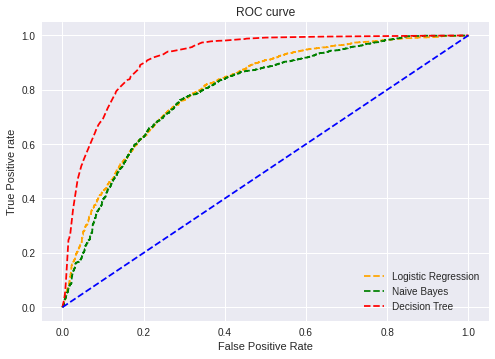

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

From the ROC curve above, model DT has the highest TP rate and lowest FP rate, making it is the best model to predict target variable out of all classifier

# **F) CONFUSION MATRIX** 

CONFUSION MATRIX

* Confusion matrix is used to visualize important metrics like recall, specificity, accuracy, and precision
* It gives direct comparisons of values like True Positives, False Positives, True Negatives and False Negatives

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import collections

classifiers = {
    "Naive Bayes": GaussianNB(),
    "LogisiticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
}

{'Naive Bayes': array([[1372,  469],
       [ 544, 1328]]), 'LogisiticRegression': array([[1344,  497],
       [ 499, 1373]]), 'DecisionTreeClassifier': array([[1572,  269],
       [ 289, 1583]])}


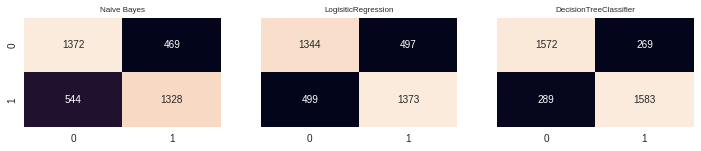

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = dict.fromkeys(classifiers.keys())
for key, classifier in classifiers.items(): 
    y_pred = classifier.fit(X_train, y_train.values.ravel()).predict(X_test)
    cf_matrix[key]=confusion_matrix(y_test, y_pred)
print(cf_matrix)

fig, axn = plt.subplots(1,3, sharex=True, sharey=True,figsize=(12,2))

for i, ax in enumerate(axn.flat):
    k = list(cf_matrix)[i]
    sns.heatmap(cf_matrix[k], ax=ax,cbar=i==4, annot=True, fmt='d')
    ax.set_title(k,fontsize=8)

* Decision Tree confusion matrix shows the highest values of True Positives and True Negatives

# **G) CLASSIFICATION REPORT**

CLASSIFICATION REPORT

It is used to measure the quality of predictions from a classification algorithm
* precision - higher precision means the algorithm returns more relevant results than irrelevant ones
* recall - high recall means the algorithm returns most of the relevant results
* F1-score - harmonic mean between precision and recall
* support - the number of occurrences of the given class in your dataset showing whether it is well-balanced dataset
* accuracy - ratio between the well classified samples (true positives and true negatives) 

* same values of macro average and weighted average indicates that the data is balanced

In [ ]:
from sklearn import metrics

y_predLR = np.around(modelLR.predict(X_test))
print (metrics.classification_report(y_test, y_predLR))

              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73      1841
         1.0       0.73      0.74      0.73      1872

    accuracy                           0.73      3713
   macro avg       0.73      0.73      0.73      3713
weighted avg       0.73      0.73      0.73      3713



In [ ]:
y_predNB = np.around(modelNB.predict(X_test))
print (metrics.classification_report(y_test, y_predNB))

              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73      1841
         1.0       0.74      0.72      0.73      1872

    accuracy                           0.73      3713
   macro avg       0.73      0.73      0.73      3713
weighted avg       0.73      0.73      0.73      3713



In [ ]:
y_predDT = np.around(modelDT.predict(X_test))
print (metrics.classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84      1841
         1.0       0.83      0.88      0.85      1872

    accuracy                           0.85      3713
   macro avg       0.85      0.85      0.85      3713
weighted avg       0.85      0.85      0.85      3713



* Decision Tree has the highest precision, recall, f1-score, and accuracy percentage
* Similar macro avg & weighted avg shows the data is balanced
* DT with VIF is the best model overall in classifying the target class

# **H) MODEL EXPLAINER AND VARIABLE IMPORTANCE**
  #Logistic Regression Model Explainer
  #Variable Importance for Logistic Regression
  #Naive Bayes Model Explainer
  #Variable Importance for Naive Bayes
  #Decision Tree Model Explainer
  #Variable Importance for Decision Tree

MODEL EXPLAINER AND VARIABLE IMPORTANCE

* This method is used to calculate the score for all input features of a prediction model
* A higher score means the bigger the effect that the feature has on the prediction

In [ ]:
# Logistic Regression Model Explainer
exp_LR = dx.Explainer(modelLR, X, y)

Preparation of a new explainer is initiated

  -> data              : 12376 rows 16 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 12376 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f1fd9c30290> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00708, mean = 0.5, max = 0.982
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.971, mean = -0.00015, max = 0.975
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Variable Importance for Logistic Regression
viLR = exp_LR.model_parts()
viLR.plot()

The Top 5 features to have biggest effect on Logistic Regression model are:
* disk_i_o_time
* disk_space_request
* cpu_request
* priority
* local_disk_space_usage

In [ ]:
# Naive Bayes Model Explainer
exp_NB = dx.Explainer(modelNB, X, y)

Preparation of a new explainer is initiated

  -> data              : 12376 rows 16 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 12376 values
  -> model_class       : sklearn.naive_bayes.GaussianNB (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f1fd9c30290> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.33e-05, mean = 0.474, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = 0.026, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



In [ ]:
# Variable Importance for Naive Bayes
viNB = exp_NB.model_parts()
viNB.plot()

The Top 5 features to have biggest effect on Naive Bayes model are:
* priority
* different_machine_restriction
* disk_i_o_time
* cycles_per_instruction
* timestamp_

In [ ]:
# Decision Tree Model Explainer
exp_DT = dx.Explainer(modelDT, X, y)

Preparation of a new explainer is initiated

  -> data              : 12376 rows 16 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 12376 values
  -> model_class       : sklearn.tree._classes.DecisionTreeClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f1fd9c30290> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.499, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = 0.000503, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
# Variable Importance for Decision Tree
viDT = exp_DT.model_parts()
viDT.plot()

The Top 5 features to have biggest effect on Decision Tree model are:
* priority
* cpu_request
* local_disk_space_usage
* task_index
* canonical_memory_usage